In [14]:
import zipfile
import os

# ZIP dosyanın Colab içindeki yolu (Dosyanı yüklediğin yer burası olmalı)
zip_path = "/content/beyin_verileri.zip"

# ZIP dosyasını çıkaracağımız hedef klasör
extract_path = "/content/beyin_verileri"

# ZIP dosyasını çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Kendi klasörünü oluştur

print("ZIP dosyası çıkarıldı.")

# Çıkarılan klasör içeriğini kontrol et
print(os.listdir(extract_path))
print("Train klasörü:", os.listdir(os.path.join(extract_path, "train")))
print("Val klasörü:", os.listdir(os.path.join(extract_path, "val")))
print("Test klasörü:", os.listdir(os.path.join(extract_path, "test")))


ZIP dosyası çıkarıldı.
['test', 'train', 'val']
Train klasörü: ['inme_var', 'inme_yok']
Val klasörü: ['inme_var', 'inme_yok']
Test klasörü: ['inme_var', 'inme_yok']


In [15]:
import numpy as np
import cv2
import os

# Görüntü boyutu
img_size = (128, 128)

# Genel veri yükleme fonksiyonu (ZIP'ten çıkarılan veriler için)
def load_dataset(dataset_type="train", limit=None):
    X, Y = [], []
    classes = ["inme_var", "inme_yok"]

    # ZIP'ten çıkarılan verinin yolu
    dataset_path = f"/content/beyin_verileri/{dataset_type}"

    for label, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        image_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith('.png')]

        # Eğer limit varsa, sadece belirli sayıda görüntü al
        if limit:
            image_files = image_files[:limit]

        for file in image_files:
            img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Gri tonlamalı oku
            img = cv2.resize(img, img_size)  # Boyutu 128x128 yap
            img = img / 255.0  # Normalizasyon (0-1 arasına getir)
            img = np.expand_dims(img, axis=-1)  # CNN için uygun hale getir

            X.append(img)
            Y.append(label)

    return np.array(X), np.array(Y)

# Train, Validation ve Test veri setlerini yükleme
X_train, Y_train = load_dataset("train")
X_val, Y_val = load_dataset("val")
X_test, Y_test = load_dataset("test")

# Veri boyutlarını kontrol et
print(f"Train Set: {X_train.shape}, Labels: {Y_train.shape}")
print(f"Validation Set: {X_val.shape}, Labels: {Y_val.shape}")
print(f"Test Set: {X_test.shape}, Labels: {Y_test.shape}")


Train Set: (4654, 128, 128, 1), Labels: (4654,)
Validation Set: (997, 128, 128, 1), Labels: (997,)
Test Set: (999, 128, 128, 1), Labels: (999,)


In [ ]:
from tensorflow.keras import layers, models

# Model2: Güncellenmiş CNN Modeli
model2 = models.Sequential([
    # 1. Convolutional + BatchNormalization + MaxPooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # 2. Convolutional + BatchNormalization + MaxPooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # 3. Convolutional + BatchNormalization + MaxPooling
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten (Düzleştirme)
    layers.Flatten(),

    # Fully Connected Layer (Tam bağlı katman) + BatchNormalization
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Overfitting'i azaltmak için Dropout

    # Çıkış Katmanı (Binary Classification için Sigmoid)
    layers.Dense(1, activation='sigmoid')
])

# Modeli Derleme
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Model Özeti
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,601 (12.61 MB)

 Trainable params: 3,304,897 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


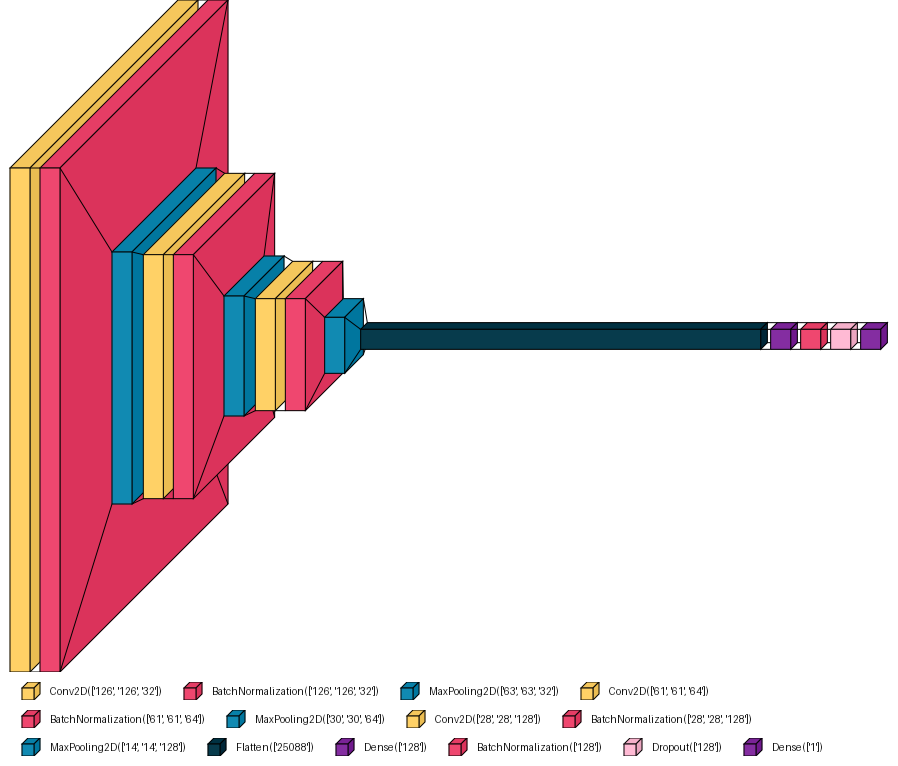

In [ ]:
import visualkeras

# Model2'nin görselleştirilmesi
visualkeras.layered_view(model2, legend=True, show_dimension=True)

In [ ]:
from google.colab import drive

# Model kayıt klasörünü tanımla
model_save_path = "/content/drive/My Drive/Model_Kayitlar"

# Eğer klasör yoksa oluştur
import os
os.makedirs(model_save_path, exist_ok=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    # EarlyStopping: Overfitting'i önlemek için
    EarlyStopping(
        monitor='val_loss',     # Validation Loss'u takip edecek
        patience=15,            # İyileşme olmazsa 15 epoch sonra duracak
        verbose=1,              # Eğitim sırasında bilgi gösterecek
        mode='min',             # Loss'un minimum olmasını istiyoruz
        restore_best_weights=True  # En iyi ağırlıkları geri yükle
    ),

    # En iyi modeli kaydetmek için
    ModelCheckpoint(
        filepath=os.path.join(model_save_path, "Best_Model_DUzCNN.keras"),  # En iyi model dosyası
        monitor='val_loss',      # Validation loss'a göre en iyiyi seç
        mode='min',              # Minimum loss hedefleniyor
        save_best_only=True,     # Sadece en iyi modeli kaydet
        save_weights_only=False, # Tüm modeli kaydet
        verbose=1
    ),

    # Her 25 epoch'ta bir modeli kaydetmek için
    ModelCheckpoint(
        filepath=os.path.join(model_save_path, "DuzCNN_Model_Epoch_{epoch:03d}.keras"),  # Epoch numaralı model kaydı
        save_freq=25 * len(X_train) // 32,  # 25 epoch'ta bir kaydet (batch_size=32 ise)
        save_weights_only=False,  # Tüm modeli kaydet
        verbose=1
    )
]


In [ ]:
history = model2.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=1000,              # Maksimum epoch sayısı
    batch_size=32,            # Batch boyutu
    callbacks=callbacks,      # Google Drive'a kayıt yapacak callback'leri ekledik
    verbose=1
)



Epoch 1/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6473 - loss: 0.7984
Epoch 1: val_loss improved from inf to 0.69593, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.6477 - loss: 0.7974 - val_accuracy: 0.5246 - val_loss: 0.6959
Epoch 2/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7756 - loss: 0.4625
Epoch 2: val_loss improved from 0.69593 to 0.62904, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.7757 - loss: 0.4624 - val_accuracy: 0.6640 - val_loss: 0.6290
Epoch 3/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8079 - loss: 0.4244
Epoch 3: val_loss did not improve from 0.62904
146/146 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8080 - loss: 0.4243 - val_accuracy: 0.3450 - val_loss: 1.7269
Epoch 4/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8533 - loss: 

In [3]:
logs = """
Epoch 1/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6473 - loss: 0.7984
Epoch 1: val_loss improved from inf to 0.69593, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.6477 - loss: 0.7974 - val_accuracy: 0.5246 - val_loss: 0.6959
Epoch 2/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7756 - loss: 0.4625
Epoch 2: val_loss improved from 0.69593 to 0.62904, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.7757 - loss: 0.4624 - val_accuracy: 0.6640 - val_loss: 0.6290
Epoch 3/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8079 - loss: 0.4244
Epoch 3: val_loss did not improve from 0.62904
146/146 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8080 - loss: 0.4243 - val_accuracy: 0.3450 - val_loss: 1.7269
Epoch 4/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8533 - loss: 0.3562
Epoch 4: val_loss improved from 0.62904 to 0.39689, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8533 - loss: 0.3561 - val_accuracy: 0.8255 - val_loss: 0.3969
Epoch 5/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9111 - loss: 0.2287
Epoch 5: val_loss improved from 0.39689 to 0.27319, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9110 - loss: 0.2287 - val_accuracy: 0.8907 - val_loss: 0.2732
Epoch 6/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9261 - loss: 0.1831
Epoch 6: val_loss improved from 0.27319 to 0.23249, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9262 - loss: 0.1831 - val_accuracy: 0.9057 - val_loss: 0.2325
Epoch 7/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9584 - loss: 0.1164
Epoch 7: val_loss did not improve from 0.23249
146/146 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9584 - loss: 0.1165 - val_accuracy: 0.7844 - val_loss: 0.5078
Epoch 8/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9408 - loss: 0.1449
Epoch 8: val_loss did not improve from 0.23249
146/146 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9407 - loss: 0.1451 - val_accuracy: 0.5216 - val_loss: 1.8318
Epoch 9/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9545 - loss: 0.1227
Epoch 9: val_loss did not improve from 0.23249
146/146 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9545 - loss: 0.1227 - val_accuracy: 0.8706 - val_loss: 0.3344
Epoch 10/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9654 - loss: 0.0915
Epoch 10: val_loss improved from 0.23249 to 0.18893, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.9654 - loss: 0.0914 - val_accuracy: 0.9198 - val_loss: 0.1889
Epoch 11/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9743 - loss: 0.0744
Epoch 11: val_loss improved from 0.18893 to 0.17787, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9743 - loss: 0.0744 - val_accuracy: 0.9218 - val_loss: 0.1779
Epoch 12/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9926 - loss: 0.0330
Epoch 12: val_loss improved from 0.17787 to 0.16129, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9926 - loss: 0.0330 - val_accuracy: 0.9308 - val_loss: 0.1613
Epoch 13/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9896 - loss: 0.0337
Epoch 13: val_loss did not improve from 0.16129
146/146 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.9896 - loss: 0.0337 - val_accuracy: 0.8977 - val_loss: 0.2582
Epoch 14/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9908 - loss: 0.0277
Epoch 14: val_loss did not improve from 0.16129
146/146 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9908 - loss: 0.0277 - val_accuracy: 0.9328 - val_loss: 0.2173
Epoch 15/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9890 - loss: 0.0317
Epoch 15: val_loss did not improve from 0.16129
146/146 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9890 - loss: 0.0318 - val_accuracy: 0.9418 - val_loss: 0.1763
Epoch 16/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9868 - loss: 0.0391
Epoch 16: val_loss improved from 0.16129 to 0.15348, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9868 - loss: 0.0390 - val_accuracy: 0.9428 - val_loss: 0.1535
Epoch 17/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9937 - loss: 0.0192
Epoch 17: val_loss improved from 0.15348 to 0.10989, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9709 - val_loss: 0.1099
Epoch 18/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9940 - loss: 0.0193
Epoch 18: val_loss did not improve from 0.10989
146/146 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.8957 - val_loss: 0.3680
Epoch 19/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9892 - loss: 0.0316
Epoch 19: val_loss did not improve from 0.10989
146/146 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.9892 - loss: 0.0317 - val_accuracy: 0.9127 - val_loss: 0.2477
Epoch 20/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9774 - loss: 0.0698
Epoch 20: val_loss did not improve from 0.10989
146/146 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9774 - loss: 0.0698 - val_accuracy: 0.8907 - val_loss: 0.3272
Epoch 21/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9868 - loss: 0.0362
Epoch 21: val_loss did not improve from 0.10989
146/146 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.9868 - loss: 0.0362 - val_accuracy: 0.9017 - val_loss: 0.2720
Epoch 22/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9913 - loss: 0.0240
Epoch 22: val_loss did not improve from 0.10989
146/146 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9913 - loss: 0.0240 - val_accuracy: 0.8616 - val_loss: 0.4903
Epoch 23/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9956 - loss: 0.0144
Epoch 23: val_loss improved from 0.10989 to 0.10390, saving model to /content/drive/My Drive/Model_Kayitlar/Best_Model_DUzCNN.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9629 - val_loss: 0.1039
Epoch 24/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9936 - loss: 0.0181
Epoch 24: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9936 - loss: 0.0181 - val_accuracy: 0.9498 - val_loss: 0.1637
Epoch 25/1000
130/146 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9972 - loss: 0.0105
Epoch 25: saving model to /content/drive/My Drive/Model_Kayitlar/DuzCNN_Model_Epoch_025.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9971 - loss: 0.0110
Epoch 25: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9971 - loss: 0.0110 - val_accuracy: 0.9338 - val_loss: 0.2215
Epoch 26/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9916 - loss: 0.0260
Epoch 26: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9338 - val_loss: 0.1853
Epoch 27/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9929 - loss: 0.0157
Epoch 27: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.9929 - loss: 0.0157 - val_accuracy: 0.9529 - val_loss: 0.1643
Epoch 28/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9942 - loss: 0.0213
Epoch 28: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9942 - loss: 0.0213 - val_accuracy: 0.9218 - val_loss: 0.3461
Epoch 29/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9920 - loss: 0.0238
Epoch 29: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9920 - loss: 0.0239 - val_accuracy: 0.8967 - val_loss: 0.3714
Epoch 30/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9882 - loss: 0.0305
Epoch 30: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9882 - loss: 0.0305 - val_accuracy: 0.9147 - val_loss: 0.3225
Epoch 31/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9870 - loss: 0.0321
Epoch 31: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.9871 - loss: 0.0321 - val_accuracy: 0.9458 - val_loss: 0.1867
Epoch 32/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9971 - loss: 0.0092
Epoch 32: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.9972 - loss: 0.0092 - val_accuracy: 0.8786 - val_loss: 0.4983
Epoch 33/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9974 - loss: 0.0083
Epoch 33: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9509 - val_loss: 0.1912
Epoch 34/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9958 - loss: 0.0151
Epoch 34: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9958 - loss: 0.0151 - val_accuracy: 0.9378 - val_loss: 0.2448
Epoch 35/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9909 - loss: 0.0255
Epoch 35: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9909 - loss: 0.0255 - val_accuracy: 0.9328 - val_loss: 0.2666
Epoch 36/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9897 - loss: 0.0307
Epoch 36: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9897 - loss: 0.0307 - val_accuracy: 0.9488 - val_loss: 0.1904
Epoch 37/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9865 - loss: 0.0331
Epoch 37: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9865 - loss: 0.0331 - val_accuracy: 0.9589 - val_loss: 0.1453
Epoch 38/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9959 - loss: 0.0090
Epoch 38: val_loss did not improve from 0.10390
146/146 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9959 - loss: 0.0090 - val_accuracy: 0.9549 - val_loss: 0.1519
Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 23.
"""


In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Regex deseni
pattern = r"Epoch (\d+)/\d+\n.*?accuracy: ([\d.]+) - loss: ([\d.]+).*?val_accuracy: ([\d.]+) - val_loss: ([\d.]+)"
matches = re.findall(pattern, logs, re.DOTALL)

# Pandas DataFrame'e dönüştür
df = pd.DataFrame(matches, columns=['Epoch', 'Train Accuracy', 'Train Loss', 'Val Accuracy', 'Val Loss'])
df = df.astype(float)  # Stringleri float'a çevir

# Çıkan verileri kontrol et
print(df.head())  # İlk birkaç satırı yazdır


   Epoch  Train Accuracy  Train Loss  Val Accuracy  Val Loss
0    1.0          0.6473      0.7984        0.5246    0.6959
1    2.0          0.7756      0.4625        0.6640    0.6290
2    3.0          0.8079      0.4244        0.3450    1.7269
3    4.0          0.8533      0.3562        0.8255    0.3969
4    5.0          0.9111      0.2287        0.8907    0.2732


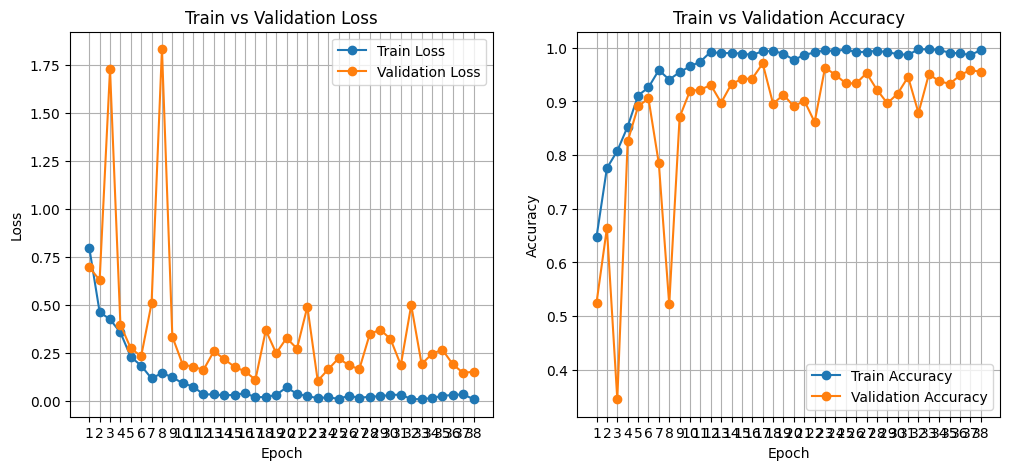

In [5]:
# Grafikleri çiz
plt.figure(figsize=(12, 5))

# Train vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', marker='o')
plt.plot(df['Epoch'], df['Val Loss'], label='Validation Loss', marker='o')
plt.xticks(range(1, int(df['Epoch'].max()) + 1))  # Her epoch gösterilecek
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.grid(True)

# Train vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(df['Epoch'], df['Val Accuracy'], label='Validation Accuracy', marker='o')
plt.xticks(range(1, int(df['Epoch'].max()) + 1))  # Her epoch gösterilecek
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()



In [6]:
from tensorflow.keras.models import load_model

# Modeli yükle
model_path = "/content/drive/MyDrive/Model_Kayitlar/Best_Model_DUzCNN.keras"
model2 = load_model(model_path)

print("✅ Model başarıyla yüklendi!")


✅ Model başarıyla yüklendi!


In [16]:
# Test seti üzerinde modelin performansını değerlendirme
test_loss, test_acc = model2.evaluate(X_test, Y_test)

print(f"\n📌 Modelin Test Accuracy (Doğruluk Oranı): {test_acc:.4f}")
print(f"📌 Modelin Test Loss (Kayıp): {test_loss:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 323ms/step - accuracy: 0.9219 - loss: 0.3001

📌 Modelin Test Accuracy (Doğruluk Oranı): 0.9489
📌 Modelin Test Loss (Kayıp): 0.1851
